<a href="https://colab.research.google.com/github/06081992/Machine-Learning-first-steps/blob/main/2.3.1.2_Maneras_de_Programar_a_una_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Maneras de Programar a una Red Neuronal - DOTCSV

## Código inicial

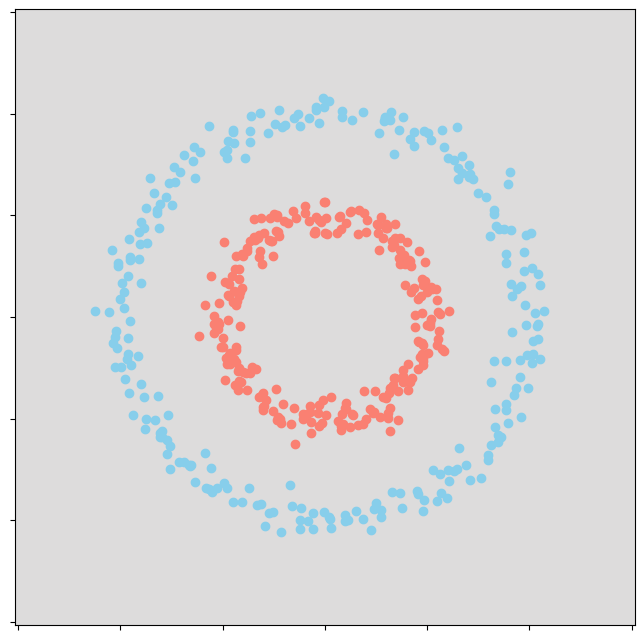

In [4]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar
# dos anillos concéntricos de datos.
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

## Tensorflow

16/16 [==============================] - 0s 2ms/step
Step 0 / 1000 - Loss =  0.4905601739883423 - Acc = 0.5
16/16 [==============================] - 0s 2ms/step
Step 25 / 1000 - Loss =  0.4905601739883423 - Acc = 0.5
16/16 [==============================] - 0s 1ms/step
Step 50 / 1000 - Loss =  0.4905601739883423 - Acc = 0.5
16/16 [==============================] - 0s 2ms/step
Step 75 / 1000 - Loss =  0.4905601739883423 - Acc = 0.5
16/16 [==============================] - 0s 2ms/step
Step 100 / 1000 - Loss =  0.4905601739883423 - Acc = 0.5
16/16 [==============================] - 0s 2ms/step
Step 125 / 1000 - Loss =  0.4905601739883423 - Acc = 0.5
16/16 [==============================] - 0s 2ms/step
Step 150 / 1000 - Loss =  0.4905601739883423 - Acc = 0.5
16/16 [==============================] - 0s 2ms/step
Step 175 / 1000 - Loss =  0.4905601739883423 - Acc = 0.5
16/16 [==============================] - 0s 2ms/step
Step 200 / 1000 - Loss =  0.4905601739883423 - Acc = 0.5
16/16 [========

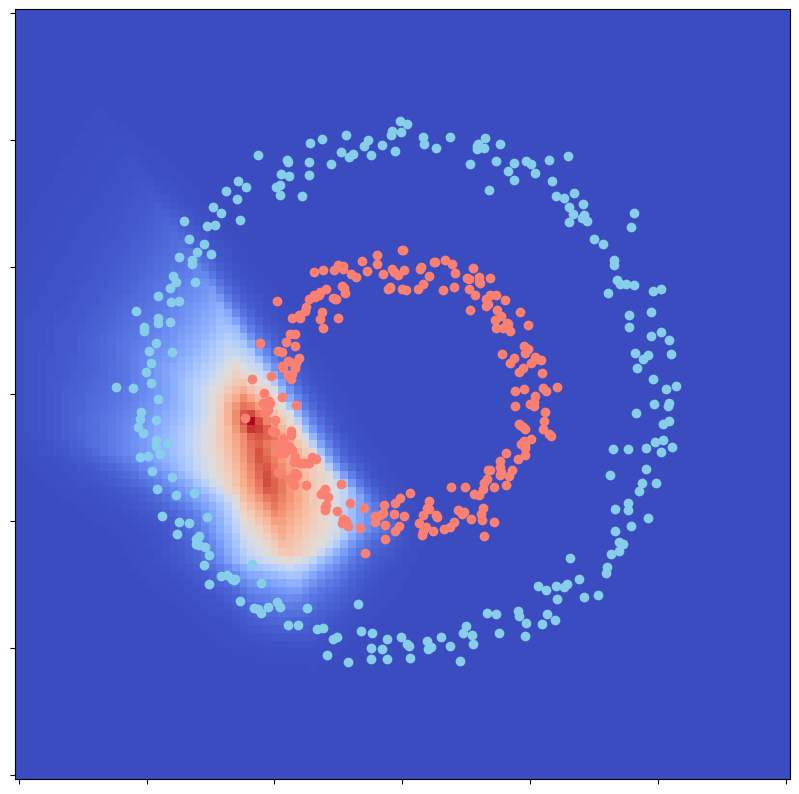

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.core.display import display, HTML

# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.keras.Input(shape=(X.shape[1],), dtype='float32')
iY = tf.keras.Input(shape=(), dtype='float32')

lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random.normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random.normal([nn[1]]), name='bias_1')

l1 = tf.keras.activations.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random.normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random.normal([nn[2]]), name='bias_2')

l2 = tf.keras.activations.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random.normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random.normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y.
pY = tf.keras.activations.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]

# Definimos al modelo.
model = tf.keras.Model(inputs=iX, outputs=pY)

# Compilamos el modelo y definimos la función de pérdida y el optimizador.
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(learning_rate=0.05))

n_steps = 1000  # Número de ciclos de entrenamiento.

iPY = []  # Aquí guardaremos la evolución de las predicción, para la animación.

# Iteramos n pases de entrenamiento.
for step in range(n_steps):
    # Entrenamos el modelo en un solo paso usando los datos de entrenamiento.
    _loss = model.train_on_batch(X, Y)
    _pY = model.predict(_pX).reshape((res, res))

    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0:
        # Cálculo del accuracy.
        acc = np.mean(np.round(model.predict(X)) == Y)

        # Impresión de métricas.
        print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)

        # Y lo guardamos para visualizar la animación.
        iPY.append(_pY)

# ----- CÓDIGO ANIMACIÓN ----- #

ims = []

fig = plt.figure(figsize=(10, 10))

print("--- Generando animación ---")

for fr in range(len(iPY)):
    im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

    # Visualización de la nube de datos.
    plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")

    # plt.title("Resultado Clasificación")
    plt.tick_params(labelbottom=False, labelleft=False)

    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_html5_video())


## Keras

In [6]:
import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.


# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['acc'])

# Y entrenamos al modelo. Los callbacks
model.fit(X, Y, epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.2505 - acc: 0.4980
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2502 - acc: 0.5000
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2499 - acc: 0.4980
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2496 - acc: 0.5020
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2493 - acc: 0.5000
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2490 - acc: 0.5020
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2488 - acc: 0.5020
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2485 - acc: 0.5040
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2482 - acc: 0.5100
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2479 - acc: 0.5080
Epoch 11/100
16/16 [==============================] - 0s 2m

## Sklearn

In [7]:
import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Creamos el objeto del modelo de red neuronal multicapa.
clf = sk.neural_network.MLPRegressor(solver='sgd',
                                     learning_rate_init=lr,
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size = 64)


# Y lo entrenamos con nuestro datos.
clf.fit(X, Y)

Iteration 1, loss = 0.73805321
Iteration 2, loss = 0.33604536
Iteration 3, loss = 0.14849407
Iteration 4, loss = 0.12702905
Iteration 5, loss = 0.13492792
Iteration 6, loss = 0.13136533
Iteration 7, loss = 0.12657124
Iteration 8, loss = 0.12513720
Iteration 9, loss = 0.12560121
Iteration 10, loss = 0.12528839
Iteration 11, loss = 0.12504782
Iteration 12, loss = 0.12521478
Iteration 13, loss = 0.12506637
Iteration 14, loss = 0.12503147
Iteration 15, loss = 0.12509571
Iteration 16, loss = 0.12502428
Iteration 17, loss = 0.12504902
Iteration 18, loss = 0.12511270
Iteration 19, loss = 0.12507097
Iteration 20, loss = 0.12504394
Iteration 21, loss = 0.12503419
Iteration 22, loss = 0.12507562
Iteration 23, loss = 0.12506843
Iteration 24, loss = 0.12503542
Iteration 25, loss = 0.12506918
Iteration 26, loss = 0.12502786
Iteration 27, loss = 0.12504303
Iteration 28, loss = 0.12503199
Iteration 29, loss = 0.12506870
Iteration 30, loss = 0.12505323
Iteration 31, loss = 0.12507442
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)